# <center> EXERCÍCIO </center>

- Qual foi a receita total de vendas do setor?
- Qual o periodo de tempo dos dados?
- Qual foi a receita total do ultimo ano observado?
- Como está a evolução das vendas ao longo do tempo?
- Qual zip que foi vendido o maior numero de peças? Qual teve maior receita?
- Qual o produto mais vendido? Qual teve maior receita? Qual é o mais caro?
- Qual o nome do produto com maior receita?
- Qual nome da cidade com maior receita?
- Qual empresa é a lider do setor?
- Como está a receita da VanArsdel em relação as demais fabricantes?
- Como foi a evolução da vendas da VanArsdel ao longo do tempo?
- Qual categoria a VanArdel tem maior numero de vendas?

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
#Importando dados SalesFacsts
vendas = pd.read_csv('salesFacts.csv', delimiter='\t')

In [108]:
pd.read_csv('salesFacts.csv', delimiter='\t').count()

ProductID    1260752
Date         1260752
Zip          1260752
Units        1260752
Revenue      1260711
dtype: int64

In [109]:
vendas.head()

,ProductID,Date,Zip,Units,Revenue
0,88,15/02/2000 12:00:00 AM,95605,92,"$926,780.40"
1,2263,12/11/2008 12:00:00 AM,33178,44,"$177,380.28"
2,2262,12/11/2008 12:00:00 AM,33178,44,"$177,380.28"
3,764,27/07/2004 12:00:00 AM,27522,40,"$146,134.80"
4,763,27/07/2004 12:00:00 AM,27522,40,"$146,134.80"


In [110]:
arq = pd.ExcelFile('Dados.xlsx')

In [111]:
arq.sheet_names

['Product', 'Manufacturer', 'Geo', 'Date']

In [112]:
product = pd.read_excel(arq, 'Product')
manufacturer = pd.read_excel(arq, 'Manufacturer')
geo = pd.read_excel(arq, 'Geo')
date = pd.read_excel(arq, 'Date')

In [113]:
product.head()

,Manufacturer,Category,Segment,Product,ProductID,isVanArsdel,IsCompeteHide,ManufacturerID,IsCompete
0,VanArsdel,Urban,Convenience,Maximus UC-01,536,Yes,N,7,No
1,VanArsdel,Urban,Convenience,Maximus UC-02,537,Yes,N,7,No
2,VanArsdel,Urban,Convenience,Maximus UC-03,538,Yes,N,7,No
3,VanArsdel,Urban,Convenience,Maximus UC-04,539,Yes,N,7,No
4,VanArsdel,Urban,Convenience,Maximus UC-05,540,Yes,N,7,No


In [114]:
manufacturer.head()

,ManufacturerID,Manufacturer,MfgisVanArsdel
0,6,Leo,No
1,12,Quibus,No
2,1,Abbas,No
3,2,Aliqui,No
4,14,Victoria,No


In [115]:
geo.head()

,Zip,City,State,Region,District
0,15201,"Pittsburgh, PA",PA,East,District #13
1,15202,"Pittsburgh, PA",PA,East,District #13
2,15203,"Pittsburgh, PA",PA,East,District #13
3,15204,"Pittsburgh, PA",PA,East,District #13
4,15205,"Pittsburgh, PA",PA,East,District #13


In [116]:
date.head()

,Date,MonthNo,MonthName,MonthID,Month,Quarter,Year,RunningMonths,Running Year,Running Months,Rolling Period,Rolling Period Sort,MonthIndex
0,36342,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
1,36343,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
2,36344,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
3,36345,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
4,36346,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7


- Qual foi a receita total de vendas do setor?

In [117]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260752 entries, 0 to 1260751
Data columns (total 5 columns):
ProductID    1260752 non-null int64
Date         1260752 non-null object
Zip          1260752 non-null int64
Units        1260752 non-null int64
Revenue      1260711 non-null object
dtypes: int64(3), object(2)
memory usage: 48.1+ MB


In [118]:
def transformar(a):
    return a.replace('$', '').replace(',', '')

vendas['Revenue'] = vendas['Revenue'].dropna().apply(transformar).astype(float)
vendas['Revenue'].sum()

7024409824.949998

- Qual o periodo de tempo dos dados?


In [119]:
from datetime import datetime

def transData(data):
    return datetime.strptime(data, '%d/%m/%Y %I:%M:%S %p')

vendas['Date']

0          15/02/2000 12:00:00 AM
1          12/11/2008 12:00:00 AM
2          12/11/2008 12:00:00 AM
3          27/07/2004 12:00:00 AM
4          27/07/2004 12:00:00 AM
5          04/04/2003 12:00:00 AM
6          25/11/2005 12:00:00 AM
7          21/07/2002 12:00:00 AM
8          02/01/2003 12:00:00 AM
9          10/11/2002 12:00:00 AM
10         11/11/2007 12:00:00 AM
11         27/12/2006 12:00:00 AM
12         28/11/2008 12:00:00 AM
13         17/04/2009 12:00:00 AM
14         11/04/2014 12:00:00 AM
15         11/09/2013 12:00:00 AM
16         30/04/2003 12:00:00 AM
17         30/04/2003 12:00:00 AM
18         27/06/2006 12:00:00 AM
19         25/04/2008 12:00:00 AM
20         30/05/2006 12:00:00 AM
21         31/01/2004 12:00:00 AM
22         30/06/2012 12:00:00 AM
23         15/11/2010 12:00:00 AM
24         05/08/2009 12:00:00 AM
25         24/01/2007 12:00:00 AM
26         29/11/2007 12:00:00 AM
27         28/06/2009 12:00:00 AM
28         03/05/2012 12:00:00 AM
29         03/

In [120]:
datas = vendas['Date'].apply(transData)

In [121]:
datas.min()

Timestamp('1999-07-15 00:00:00')

In [122]:
datas.max()

Timestamp('2014-12-30 00:00:00')

In [123]:
tempo = datas.max() - datas.min()
tempo

Timedelta('5647 days 00:00:00')

- Qual foi a receita total do ultimo ano observado?


In [124]:
vendas.index = datas
vendas.tail()

,ProductID,Date,Zip,Units,Revenue
Date,,,,,
2006-02-10,2213,10/02/2006 12:00:00 AM,15135,1,1070.37
2004-06-03,2213,03/06/2004 12:00:00 AM,80120,1,1070.37
2003-11-27,2213,27/11/2003 12:00:00 AM,30028,1,1070.37
2006-09-30,2213,30/09/2006 12:00:00 AM,65279,1,1070.37
2005-06-22,2213,22/06/2005 12:00:00 AM,25526,1,1070.37


In [125]:
vendas['2014']['Revenue'].sum()

393703982.90999997

- Como está a evolução das vendas ao longo do tempo?


In [126]:
vendas.head()

,ProductID,Date,Zip,Units,Revenue
Date,,,,,
2000-02-15,88,15/02/2000 12:00:00 AM,95605,92,926780.40
2008-11-12,2263,12/11/2008 12:00:00 AM,33178,44,177380.28
2008-11-12,2262,12/11/2008 12:00:00 AM,33178,44,177380.28
2004-07-27,764,27/07/2004 12:00:00 AM,27522,40,146134.80
2004-07-27,763,27/07/2004 12:00:00 AM,27522,40,146134.80


In [127]:
vendasMonth = vendas.groupby(pd.Grouper(freq='M')).sum()

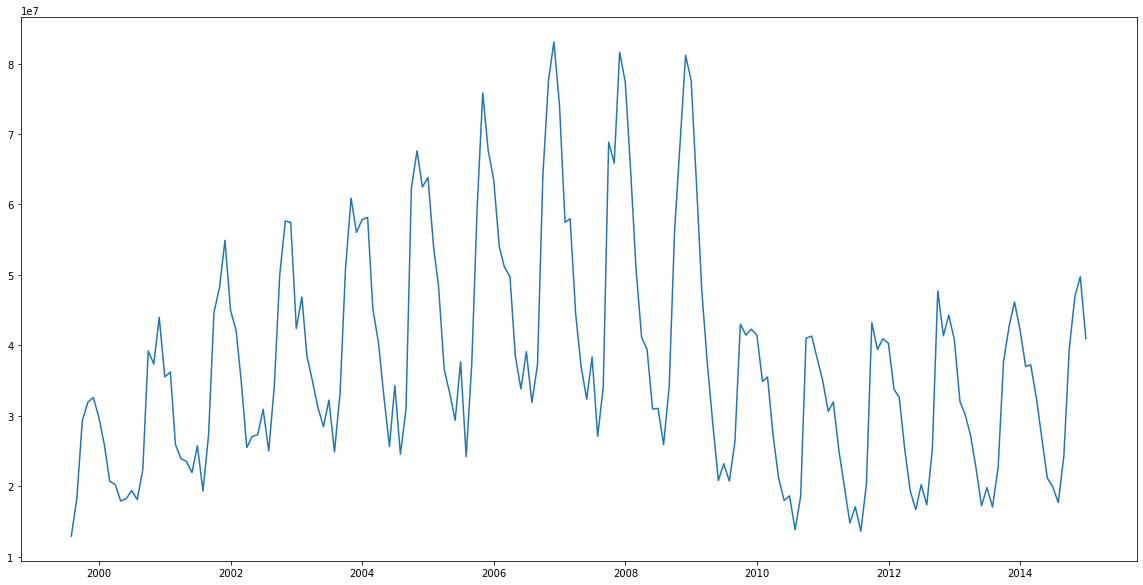

In [128]:
figura = plt.figure(figsize=(20,10)) # largura, altura
plt.plot(vendasMonth['Revenue'])

- Qual zip que foi vendido o maior numero de peças? Qual teve maior receita?


In [129]:
grupo = zipsGrouped = vendas.groupby(by='Zip').sum()
grupo.loc[grupo['Units'].idxmax()]

ProductID    1161080.00
Units            949.00
Revenue      3912102.81
Name: 93065, dtype: float64

In [130]:
grupo.loc[grupo['Revenue'].idxmax()]

ProductID     364831.00
Units            743.00
Revenue      7025565.96
Name: 12225, dtype: float64

- Qual o produto mais vendido? Qual teve maior receita? Qual é o mais caro?


In [131]:
goupeByProduct = vendas.groupby(by='ProductID').count()
goupeByProduct['Units'].max()

14355

In [134]:
vendas.groupby(by='ProductID').count()

,Date,Zip,Units,Revenue
ProductID,,,,
1,64,64,64,64
3,949,949,949,949
4,227,227,227,227
5,2,2,2,2
7,35,35,35,35
8,691,691,691,691
9,548,548,548,548
10,21,21,21,21
11,1,1,1,1


In [101]:
goupeByProduct['Units'].idxmax()

604

In [135]:
goupeByProduct.loc[604]

Date       14355
Zip        14355
Units      14355
Revenue    14355
Name: 604, dtype: int64

In [102]:
vendas[vendas.ProductID == 604]

,ProductID,Date,Zip,Units,Revenue
Date,,,,,
2000-02-15,604,15/02/2000 12:00:00 AM,95605,92,926780.40
2008-11-12,604,12/11/2008 12:00:00 AM,33178,44,177380.28
2008-11-12,604,12/11/2008 12:00:00 AM,33178,44,177380.28
2004-07-27,604,27/07/2004 12:00:00 AM,27522,40,146134.80
2004-07-27,604,27/07/2004 12:00:00 AM,27522,40,146134.80
2003-04-04,604,04/04/2003 12:00:00 AM,61790,40,85654.80
2005-11-25,604,25/11/2005 12:00:00 AM,37214,36,71419.32
2002-07-21,604,21/07/2002 12:00:00 AM,78752,33,51954.21
2003-01-02,604,02/01/2003 12:00:00 AM,95605,31,334548.90


In [137]:
vendas.groupby(by='ProductID').sum() # solução ideal

,Zip,Units,Revenue
ProductID,,,
1,3415689,64,3.165120e+05
3,59771717,971,1.051727e+07
4,13852289,228,2.190523e+06
5,124320,2,1.789200e+04
7,2323651,36,1.910519e+05
8,41255388,704,3.761314e+06
9,37164105,568,4.019847e+06
10,1248851,21,1.718577e+05
11,93546,1,9.135000e+03


In [138]:
 vendas.groupby(by='ProductID').sum()['Units'].idxmax()

604

In [143]:
vendas.iloc[604]

ProductID                       495
Date         12/09/2004 12:00:00 AM
Zip                           32714
Units                             6
Revenue                       61047
Name: 2004-09-12 00:00:00, dtype: object

In [148]:
vendas.groupby(by='ProductID').sum()['Revenue'].idxmax()

826

In [147]:
vendas.iloc[826]

ProductID                       727
Date         15/12/1999 12:00:00 AM
Zip                           95066
Units                             5
Revenue                     3776.85
Name: 1999-12-15 00:00:00, dtype: object

In [149]:
product.head()

,Manufacturer,Category,Segment,Product,ProductID,isVanArsdel,IsCompeteHide,ManufacturerID,IsCompete
0,VanArsdel,Urban,Convenience,Maximus UC-01,536,Yes,N,7,No
1,VanArsdel,Urban,Convenience,Maximus UC-02,537,Yes,N,7,No
2,VanArsdel,Urban,Convenience,Maximus UC-03,538,Yes,N,7,No
3,VanArsdel,Urban,Convenience,Maximus UC-04,539,Yes,N,7,No
4,VanArsdel,Urban,Convenience,Maximus UC-05,540,Yes,N,7,No


In [156]:
a = product

In [157]:
a.index = a['ProductID']

In [158]:
a.head()

,Manufacturer,Category,Segment,Product,ProductID,isVanArsdel,IsCompeteHide,ManufacturerID,IsCompete
ProductID,,,,,,,,,
536,VanArsdel,Urban,Convenience,Maximus UC-01,536,Yes,N,7,No
537,VanArsdel,Urban,Convenience,Maximus UC-02,537,Yes,N,7,No
538,VanArsdel,Urban,Convenience,Maximus UC-03,538,Yes,N,7,No
539,VanArsdel,Urban,Convenience,Maximus UC-04,539,Yes,N,7,No
540,VanArsdel,Urban,Convenience,Maximus UC-05,540,Yes,N,7,No


In [161]:
a.loc[826]['Product']

'Natura UM-10'

In [162]:
geo.head()

,Zip,City,State,Region,District
0,15201,"Pittsburgh, PA",PA,East,District #13
1,15202,"Pittsburgh, PA",PA,East,District #13
2,15203,"Pittsburgh, PA",PA,East,District #13
3,15204,"Pittsburgh, PA",PA,East,District #13
4,15205,"Pittsburgh, PA",PA,East,District #13


In [166]:
a = geo
a.index = geo.Zip
a.loc[95066]['City']

'Scotts Valley, CA'